In [2]:
import pandas as pd
df = pd.read_csv(r"C:\CrimeCodeAgg_NoNull.csv")
df

,X,Y,RecId,CrimeId,AgencyId,Block,Street,City,State,Zip,CrimeCode,CrimeDescription,AggregatedDesc
0,-122.112678,37.694129,409715,18022029,ACSO,16400 E 14TH ST,16496 E 14TH ST,SAN LEANDRO,CA,94578,999,INFORMATIONAL REPORT,Officer Information
1,-122.127470,37.704426,438883,19022135,ACSO,E 14TH ST/ 156TH AV,E 14TH ST/ 156TH AV,SAN LEANDRO,CA,94578,90D,DUI ALCOHOL/DRUGS,DUI
2,-122.127470,37.704426,438883,19022135,ACSO,E 14TH ST/ 156TH AV,E 14TH ST/ 156TH AV,SAN LEANDRO,CA,94578,35A,POSSESS CONTROLLED SUBSTANCE,Patrol Information
3,-122.127470,37.704426,438883,19022135,ACSO,E 14TH ST/ 156TH AV,E 14TH ST/ 156TH AV,SAN LEANDRO,CA,94578,35B,POSSESS CONTROLLED SUBSTANCE PARAPHERNALIA,Controlled Substance
4,-122.083304,37.697385,438884,19022136,ACSO,20400 ANITA AV,20451 ANITA AV,CASTRO VALLEY,CA,94546,13B,INFLICT CORPORAL INJURY ON SPOUSE/COHABITANT,Battery
5,-122.114076,37.693047,438885,19022137,ACSO,1100 KENTWOOD LA,1120 KENTWOOD LA,SAN LORENZO,CA,94580,90C,DOMESTIC - DISTURB BY LOUD/UNREASONABLE NOISE,Domestic
6,-122.107937,37.687661,438887,19022139,ACSO,800 E LEWELLING BL,827 E LEWELLING BL,HAYWARD,CA,94541,999,72 HOUR MENTAL HEALTH,5150
7,-122.027014,37.715932,438895,19022141,ACSO,6800 LARIAT LA,6883 LARIAT LA,CASTRO VALLEY,CA,94552,35A,USE/UNDER INFLUENCE OF CONTROLLED SUBSTANCE,Controlled Substance
8,-122.089451,37.674396,438897,19022142,ACSO,W A ST/ HESPERIAN BL,W A ST/ HESPERIAN BL,HAYWARD,CA,94541,35B,POSSESS CONTROLLED SUBSTANCE PARAPHERNALIA,Controlled Substance
9,-122.089451,37.674396,438897,19022142,ACSO,W A ST/ HESPERIAN BL,W A ST/ HESPERIAN BL,HAYWARD,CA,94541,35A,POSSESS CONTROLLED SUBSTANCE,Controlled Substance


In [4]:
from io import StringIO

col = ["AggregatedDesc","CrimeDescription"]
df = df[col]
df = df[pd.notnull(df['CrimeDescription'])]

df.columns = ["AggregatedDesc","CrimeDescription"]

df['category_id'] = df["AggregatedDesc"].factorize()[0]

In [5]:
category_id_df = df[['AggregatedDesc', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'AggregatedDesc']].values)

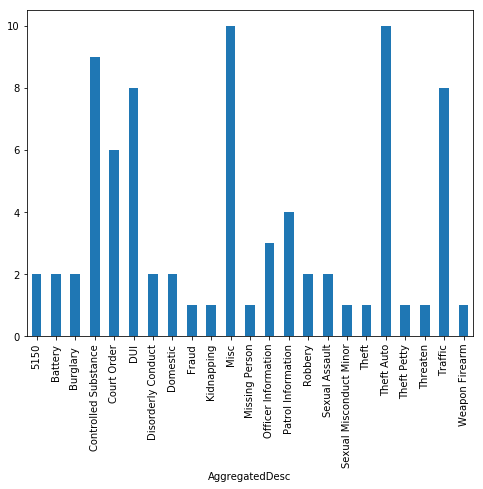

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('AggregatedDesc').CrimeDescription.count().plot.bar(ylim=0)
plt.show();

In [8]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.CrimeDescription).toarray()
labels = df.category_id
features.shape

(80L, 16L)

In [9]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for AggregatedDesc, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format( AggregatedDesc))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# '5150':
  . Most correlated unigrams:
. veh
. dui
  . Most correlated bigrams:
. possess controlled
. controlled substance
# 'Battery':
  . Most correlated unigrams:
. veh
. dui
  . Most correlated bigrams:
. possess controlled
. controlled substance
# 'Burglary ':
  . Most correlated unigrams:
. possess
. burglary
  . Most correlated bigrams:
. possess controlled
. controlled substance
# 'Controlled Substance':
  . Most correlated unigrams:
. controlled
. substance
  . Most correlated bigrams:
. possess controlled
. controlled substance
# 'Court Order':
  . Most correlated unigrams:
. warrant
. veh
  . Most correlated bigrams:
. possess controlled
. controlled substance
# 'DUI':
  . Most correlated unigrams:
. alcohol
. dui
  . Most correlated bigrams:
. controlled substance
. dui alcohol
# 'Disorderly Conduct':
  . Most correlated unigrams:
. dui
. alcohol
  . Most correlated bigrams:
. possess controlled
. controlled substance
# 'Domestic':
  . Most correlated unigrams:
. veh
. du

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['CrimeDescription'], df['AggregatedDesc'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

C:\Users\jsobryan\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\model_selection\_split.py:651: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\jsobryan\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jsobryan\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


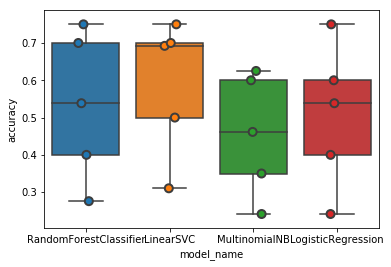

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [13]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.590531
LogisticRegression        0.505968
MultinomialNB             0.455584
RandomForestClassifier    0.532865
Name: accuracy, dtype: float64

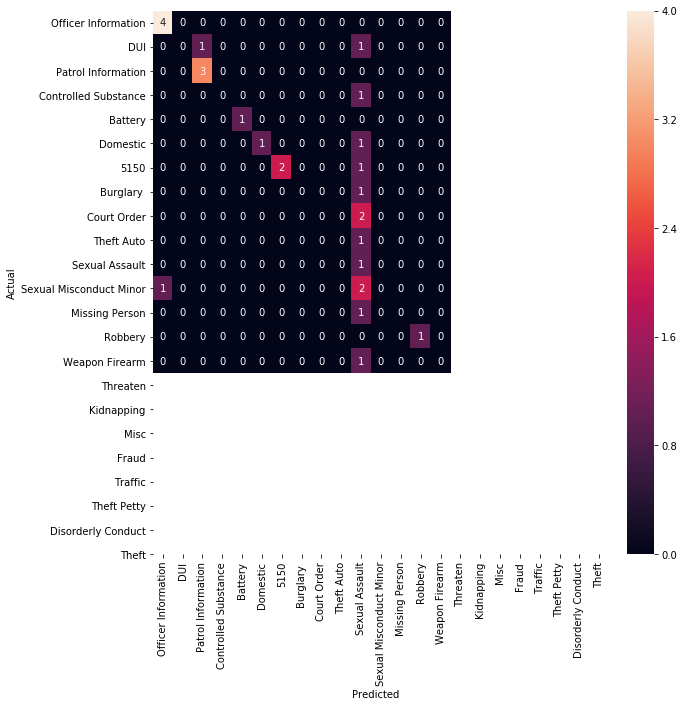

In [15]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.AggregatedDesc.values, yticklabels=category_id_df.AggregatedDesc.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [28]:
from IPython.display import display
for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 100:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['AggregatedDesc', 'CrimeDescription']])
      print('')

IndexError: index 15 is out of bounds for axis 0 with size 15

In [17]:
model.fit(features, labels)
N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# '5150':
  . Top unigrams:
       . paraphernalia
       . substance
  . Top bigrams:
       . dui alcohol
       . substance paraphernalia
# 'Battery':
  . Top unigrams:
       . paraphernalia
       . substance
  . Top bigrams:
       . dui alcohol
       . substance paraphernalia
# 'Burglary ':
  . Top unigrams:
       . possess
       . burglary
  . Top bigrams:
       . dui alcohol
       . substance paraphernalia
# 'Controlled Substance':
  . Top unigrams:
       . substance
       . controlled
  . Top bigrams:
       . controlled substance
       . substance paraphernalia
# 'Court Order':
  . Top unigrams:
       . veh
       . warrant
  . Top bigrams:
       . dui alcohol
       . substance paraphernalia
# 'DUI':
  . Top unigrams:
       . dui
       . alcohol
  . Top bigrams:
       . dui alcohol
       . substance paraphernalia
# 'Disorderly Conduct':
  . Top unigrams:
       . alcohol
       . paraphernalia
  . Top bigrams:
       . substance paraphernalia
       . possess 

In [19]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['AggregatedDesc'].unique()))

ValueError: Number of classes, 15, does not match size of target_names, 23. Try specifying the labels parameter